# ARE 212 Assignment 1

## Aline Abayo, Eleanor Adachi, Anna Cheyette, Karla Neri and Stephen Stack

## 1. Admin

We created a fork of the main GitHub repository. Our code can be found here: https://github.com/eleanor-adachi/ARE212_Materials

## 2. Exercises

### (1)

**From ARE210, recall (Section 9 in Mahajan’s “Handout 1”) the rule for computing the distribution of certain transformations
of random variables (the “inverse Jacobian rule”). Let** $(x, y)$ **be independently distributed continuous random variables possessing densities** $f_x$ **and** $f_y$. **Let** $z = x+y$. **Use the rule to obtain an expression for the distribution of** $z$.

Given two random variables $x$ and $y$ where $y=f(x)$ and $x$ has probability density function $p_x(x)$

Then $p_y(y) = p_x(x)|\frac{dx}{dy}| = p_x(x)|\frac{df^{-1}(y)}{dy}|$

For $z = x + y$ where $x$ has probability density function $f_x(x)$ and $y$ has probability density function $f_y(y)$,

$f_z(z) = f_x(x)|\frac{\partial x}{\partial z}| \cdot f_y(y)|\frac{\partial y}{\partial z}|$

$x = z - y$ and $y = z - x$, so $\frac{\partial x}{\partial z} = 1$ and $\frac{\partial y}{\partial z} = 1$

Therefore, $z$ has a continuous distribution with probability density $f_z$ given by

$f_z(z) = \int_{-\infty}^{\infty} f_x(x) f_y(z-x) \,dx$

### (2)

**We've discussed ways to program a convolution of random variables in a Jupyter notebook. As in the notebook, consider a discrete random variable** $s$ **and a continuous random variable** $x$. **Prove that the convolution of** $s$ **and** $x$ **(or, informally,** $x+s$**) has a continuous distribution, as suggested by the figure at the end of the notebook, or establish that the figure is wrong or misleading.**

*Definition*: a convolution occurs when two mathematical functions are combined. In this context, we are combining two functions that give the probability distributions of random variables, and creating a new probability distribution which is a sum of those two.

In this case, we are interested in convolutions of a continuous and a random variable, and we want to prove that the convolved distribution is continuous. As suggested in the lecture, a proof of this is that it has a density, rather than being a collection of mass points.

First, let's set up a similar pair of distributions as was done in lecture.

In [12]:
""" First, a continuous random variable x"""
from   scipy.stats import distributions as iid
from   scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Let's customize this distribution
mean  = 2
sigma = 2

x = iid.norm(loc=mean, scale=sigma)

# Produce some characteristics
print("E(x) = %6.4f" % x.mean())
print()
print("Some (central) moments of x:")
print([(m,x.moment(m)) for m in [1,2,3,4]])
print()
print(x.cdf(0), x.pdf(0))

# Produce some realisations
N = 15
print(x.rvs(N))

E(x) = 2.0000

Some (central) moments of x:
[(1, 2.0), (2, 8.0), (3, 32.0), (4, 160.0)]

0.15865525393145707 0.12098536225957168
[ 2.17018416  1.52608854  2.95588091  3.20481959  3.08339525  2.01689363
  1.30876744  0.68274542  1.87190012  4.1154055   4.62953871  0.8933016
 -1.50222758  2.8149057  -0.73295123]


[7.43359757e-07 1.22553052e-06 1.99994519e-06 3.23058320e-06
 5.16550329e-06 8.17547945e-06 1.28080406e-05 1.98619112e-05
 3.04879520e-05 4.63238177e-05 6.96705616e-05 1.03720154e-04
 1.52843113e-04 2.22944862e-04 3.21897749e-04 4.60052385e-04
 6.50826921e-04 9.11365548e-04 1.26324789e-03 1.73321896e-03
 2.35389538e-03 3.16438821e-03 4.21076724e-03 5.54627742e-03
 7.23120740e-03 9.33230497e-03 1.19216373e-02 1.50748070e-02
 1.88684616e-02 2.33770712e-02 2.86690026e-02 3.48019792e-02
 4.18180886e-02 4.97385694e-02 5.85586798e-02 6.82430046e-02
 7.87215938e-02 8.98873326e-02 1.01594918e-01 1.13661753e-01
 1.25870973e-01 1.37976686e-01 1.49711342e-01 1.60795012e-01
 1.70946147e-01 1.79893279e-01 1.87386990e-01 1.93211427e-01
 1.97194617e-01 1.99216901e-01 1.99216901e-01 1.97194617e-01
 1.93211427e-01 1.87386990e-01 1.79893279e-01 1.70946147e-01
 1.60795012e-01 1.49711342e-01 1.37976686e-01 1.25870973e-01
 1.13661753e-01 1.01594918e-01 8.98873326e-02 7.87215938e-02
 6.82430046e-02 5.855867

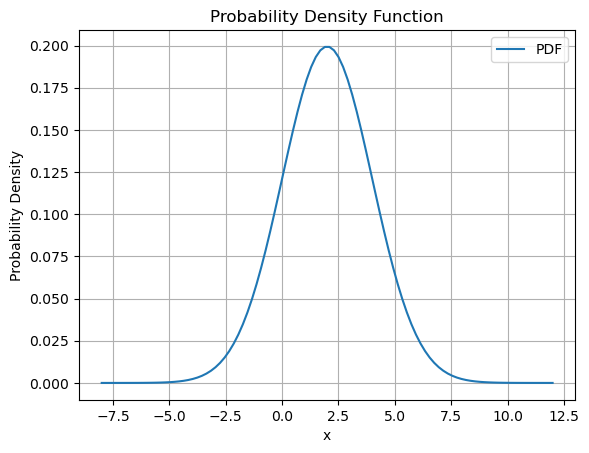

In [13]:
""" Let's take a look at the pdf for this distribution """
# x-values
x_values = np.linspace(mean - 5*sigma, mean + 5*sigma, 100)

# Get PDF
pdf_values = x.pdf(x_values)
print(pdf_values)

# Plot
plt.plot(x_values, pdf_values, label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
""" Next, do a discrete variable"""
omega =(-5, -2, 0, 3, 10)
Pr    =(1/12, 3/12, 1/12, 2/12, 5/12)

s = iid.rv_discrete(values=(omega, Pr))

# Produce some characteristics 
print("E(s) = %6.4f" % s.mean())
print()
print("Some moments of s:")
print([(m,s.moment(m)) for m in [1,2,3,4]])
print()
print("95%% confidence interval: (%f,%f)" % s.interval(0.95))
print()
# Note! Not pdf, but pmf for discrete rv.
print(s.cdf(0),s.pmf(0))

# Produce some realisations
N=20
realizations = [s.rvs() for _ in range(N)] # N realizations; no longer random
print(realizations)

E(s) = 3.7500

Some moments of s:
[(1, 3.7500000000000004), (2, 46.25000000000001), (3, 408.75), (4, 4236.25)]

95% confidence interval: (-5.000000,10.000000)

0.41666666666666663 0.08333333333333333
[10, 10, 10, -2, -5, 10, 0, 3, 0, 10, 10, -2, 0, 3, -2, 3, 10, 3, -2, 0]


[0.08333333 0.25       0.08333333 0.16666667 0.41666667]


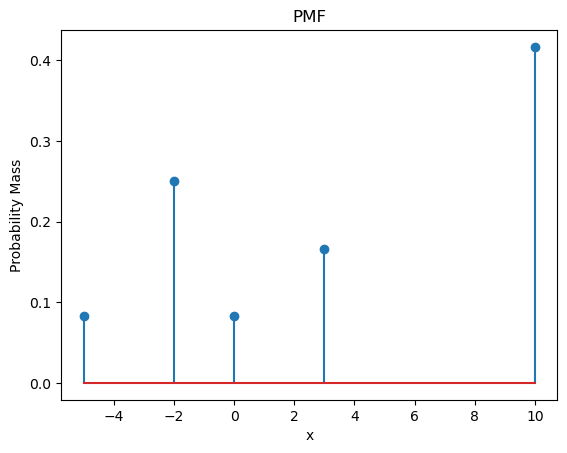

In [15]:
""" Next do the probability mass function for this """
# PMF
pmf_values = s.pmf(omega)
print(pmf_values)

# Plot this
plt.stem(omega, pmf_values, markerfmt='o', linefmt='-')
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.title('PMF')
plt.show()


Next, define the convolved distribution

In [16]:
from scipy.stats import distributions as iid

# Code to convolve a random variable with a pmf and another having a cdf
# Exploits =scipy.stats= base rv_continuous class.

class ConvolvedContinuousAndDiscrete(iid.rv_continuous):

    """Convolve (add) a continuous rv x and a discrete rv s,
       returning the resulting cdf."""

    def __init__(self,f,s):
        self.continuous_rv = f
        self.discrete_rv = s
        super(ConvolvedContinuousAndDiscrete, self).__init__(name="ConvolvedContinuousAndDiscrete")
        
    def _cdf(self,z):
        F=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            F = F + x.cdf(z-s.xk[k])*s.pk[k]
        return F

    def _pdf(self,z):
        f=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            f = f + x.pdf(z-s.xk[k])*s.pk[k]
        return f


# Create new convolved rv:
y = ConvolvedContinuousAndDiscrete(x,s)

In [17]:
import plotly.graph_objects as go
import numpy as np

X = np.linspace(-4,4,100).tolist()

fig = go.Figure(data=go.Scatter(x=X, y=[y.pdf(z) for z in X]))
fig.show()

There are two ways we can prove that this is continuous. The first is by thinking about the convolution operation itself. When we convolve a continuous and weighted distribution, for each given value in the continuous function, we shift the discrete function and then multiply the product of the two functions (in this case, taking a weighted average across the different possible values for the discrete function). Since we know that the product of multiplying a continuous and discrete number is a continuous number, it follows that each each value at th

In [18]:
input = 0
for z in X:
   for k in range(len(s.xk)):
      a = z-s.xk[k]
      b = s.pk[k]
      input = input + (a*b)

   print(input)
    


-7.75
-15.419191919191919
-23.007575757575758
-30.51515151515152
-37.9419191919192
-45.28787878787879
-52.5530303030303
-59.737373737373744
-66.84090909090911
-73.86363636363637
-80.80555555555556
-87.66666666666666
-94.44696969696967
-101.14646464646464
-107.76515151515152
-114.30303030303031
-120.76010101010102
-127.13636363636365
-133.43181818181822
-139.64646464646466
-145.78030303030303
-151.83333333333331
-157.80555555555551
-163.69696969696963
-169.50757575757567
-175.23737373737367
-180.88636363636363
-186.4545454545455
-191.94191919191928
-197.348484848485
-202.6742424242426
-207.91919191919214
-213.0833333333336
-218.16666666666697
-223.16919191919226
-228.09090909090946
-232.93181818181858
-237.69191919191962
-242.37121212121258
-246.96969696969745
-251.48737373737424
-255.92424242424295
-260.28030303030357
-264.55555555555605
-268.75000000000045
-272.8636363636368
-276.896464646465
-280.84848484848516
-284.7196969696972
-288.5101010101012
-292.2196969696972
-295.84848484848

### (3)

Let $A$ be an $m \times n$ matrix. A matrix  $\mathrm{A}^{-}$ is a generalized inverse of $A$ if $\mathrm{AA}^{-}A=A$. Such a generalized inverse can be shown to always exist. If A is a matrix of zeros, what can we say about $\mathrm{A}^{-}$.

In [19]:
%reset -f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

seed_value = 42

# Define a random matrix A (m x n)
m = 3  # number of rows
n = 2  # number of columns
A = np.random.rand(m, n)

# Calculate the generalized inverse A-
A_inv = np.linalg.pinv(A)

# Calculate AA-A
result = np.dot(np.dot(A, A_inv), A)

# Check if AA-A = A (within a small tolerance due to floating-point precision)
tolerance = 1e-10
is_identity = np.allclose(result, A, atol=tolerance)

print("Matrix A:")
print(A)

print("\nGeneralized Inverse A-:")
print(A_inv)

print("\nAA-A:")
print(result)

Matrix A:
[[0.60975469 0.30006701]
 [0.33974806 0.10006655]
 [0.45802769 0.25721961]]

Generalized Inverse A-:
[[  0.23677217   6.07907544  -2.64116577]
 [  1.3284012  -11.64197728   6.86714025]]

AA-A:
[[0.60975469 0.30006701]
 [0.33974806 0.10006655]
 [0.45802769 0.25721961]]


Now, if matrix $A$ is a matrix of zeros, then it is a zero matrix, denoted as 0. In this case, $\mathrm{A}^{-}$, the generalized inverse of A, would be the Moore-Penrose pseudoinverse of the zero matrix. The Moore-Penrose pseudoinverse of a zero matrix is the zero matrix itself. This can be understood from the properties of the Moore-Penrose pseudoinverse:

If A is a zero matrix, then $\mathrm{A}^{+}=\mathrm{A}^{-}=\mathrm{A}^{´}=0$

So, in summary, if A is a matrix of zeros, its generalized inverse A− is also a zero matrix.

In [20]:
import sympy as sp
import pandas as pd
A = np.zeros((m, n))# Calculate the generalized inverse A-
A_inv = np.linalg.pinv(A)

# Calculate AA-A
result = np.dot(np.dot(A, A_inv), A)

# Check if AA-A = A (within a small tolerance due to floating-point precision)
tolerance = 1e-10
is_identity = np.allclose(result, A, atol=tolerance)

print("Matrix A:")
print(A)

print("\nGeneralized Inverse A-:")
print(A_inv)

print("\nAA-A:")
print(result)

Matrix A:
[[0. 0.]
 [0. 0.]
 [0. 0.]]

Generalized Inverse A-:
[[0. 0. 0.]
 [0. 0. 0.]]

AA-A:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


### (4)

Econometricians spend a great deal of time writing down linear regressions relating an object “Why” to an object “Ex”, but sometimes use quite distinct notations to express this regression. Following our discussion in class, suggest a notation for
each of the three following cases:

(a) “Why” is a scalar random variable, while “Ex” is a vector
random variable;

$ y= \beta X + \upsilon $

(b) “Why” is a single realization of a scalar random variable,
while “Ex” is similarly a single realization;

$ y= \beta x + \upsilon $

(c) “Why” is a vector of N realizations, while “Ex” is similarly
a matrix of realizations.

$ Y= \beta X + \upsilon $

### (5)

**Moore-Penrose Inverse**

---

A matrix $A^+$ is a "Moore-Penrose" generalized inverse if:

- $AA^+A = A$;
- $A^+AA^+ = A^+$;
- $A^+A$ is symmetric; and
- $AA^+$ is symmetric.

**Full Rank Factorization**

---

Let $A$ be an $n\times m$ matrix of rank $r$. If $A = LR$, where $L$ is an $n\times r$ full column rank matrix, and $R$ is a $r\times m$ full row rank matrix, then $LR$ is a full rank factorization of $A$.

**Fact**

---

Provided only that $r>0$, the Moore-Penrose inverse $A^+ = R^{\top}(L^{\top}AR^{\top})^{-1}L^{\top}$ exists and is unique.

---

#### 1. If $A$ is a matrix of zeros, what is $A^+$?

For a matrix $A$ consisting entirely of zeros, its Moore-Penrose inverse, $A^+$, is also a matrix consisting entirely of zeros. This conclusion follows directly from the properties of the Moore-Penrose inverse:

- $AA^+A = A$; multiplying $A^+$, which is a zero matrix, by $A$ from both sides will result in a zero matrix, satisfying this property.
- $A^+AA^+ = A^+$; similarly, since $A$ is a zero matrix, $A^+$ remains unchanged and thus must also be a zero matrix to satisfy this property.
- $A^+A$ is symmetric; a zero matrix multiplied by another zero matrix is still a zero matrix, which is inherently symmetric.
- $AA^+$ is symmetric; likewise, this multiplication results in a zero matrix, which is symmetric.

Hence, when $A$ is a matrix of zeros, $A^+$ is also a matrix of zeros.


#### 2. Show  that if $X$ has full column rank, then $X^+ = (X^TX)^{-1}X^T$ (this is sometimes called the "left inverse"), and $X^+ X = I$.

Given a matrix $X$ with full column rank, it means that all columns of $X$ are linearly independent. This implies that the matrix $X^TX$ is invertible. The Moore-Penrose inverse of $X$, $X^+$, satisfies the property that $XX^+X = X$.

For matrices with full column rank, the Moore-Penrose inverse can be specifically expressed as $X^+ = (X^TX)^{-1}X^T$. This expression is sometimes referred to as the "left inverse" because when it is multiplied by $X$ from the left, it results in the identity matrix, $I$.

*Proof:*

1. **Start with the expression for $X^+$**: 

   We have $X^+ = (X^TX)^{-1}X^T$.

2. **Show that multiplying by $X$ yields $I$**:

   Calculate $X^+X = [(X^TX)^{-1}X^T]X = (X^TX)^{-1}(X^TX) = I$.
   
   Here, the product $(X^TX)$ is invertible because $X$ has full column rank, ensuring that $X^TX$ is a full rank square matrix and thus invertible. Multiplying this invertible matrix by its inverse yields the identity matrix, $I$.

This demonstrates that when $X$ has full column rank, its Moore-Penrose inverse $X^+$, when multiplied by $X$, yields the identity matrix, confirming that $X^+X = I$.

#### (3.) Use the result of (2) to solve for $b$ in the (matrix) form of theregression $y = Xb + u$ if $X^Tu = 0$.

Given the regression equation $y = Xb + u$ where $X$ has full column rank and it's given that $X^Tu = 0$, we aim to solve for the coefficient vector $b$. We leverage the property of the Moore-Penrose inverse that if $X$ has full column rank, then $X^+ = (X^TX)^{-1}X^T$ and $X^+X = I$.

**Starting from the regression equation**: 

   $$y = Xb + u$$

**Apply the Moore-Penrose inverse of $X$ to both sides**:

   Since we know $X^+X = I$, multiplying both sides by $X^+$ yields:

   $$X^+y = X^+Xb + X^+u$$

**Given that $X^Tu = 0$**:

   This simplifies to:

   $$X^+y = X^+Xb + 0$$

   Which further simplifies to:

   $$X^+y = b$$

   Because $X^+X = I$.

**Thus, the solution for $b$ is**:

   $$b = X^+y$$

   Where $X^+ = (X^TX)^{-1}X^T$ is the Moore-Penrose inverse of $X$.

This method shows how to isolate the coefficient vector $b$ in the presence of a noise vector $u$ that is orthogonal to the column space of $X$ ($X^Tu = 0$). 